In [76]:
# General utilities
import numpy as np
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing
from sklearn.preprocessing import (MinMaxScaler, StandardScaler,
                                   RobustScaler, Normalizer,
                                   QuantileTransformer, PowerTransformer)
from sklearn.preprocessing import (OneHotEncoder, PolynomialFeatures,
                                   LabelEncoder)
from collections import Counter

# Machine Learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix, make_scorer


# Handling imbalanced datasets
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost
!pip install shap
import shap

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

### **Functions**

In [77]:
def filter_non_numbers(data):

    def is_number(value):
        # Check for int or float first
        if isinstance(value, (int, float)):
            return True
        # Try to convert strings that represent numbers
        if isinstance(value, str):
            try:
                float(value)
                return True  # Conversion succeeded, treat as a number
            except ValueError:
                return False  # Conversion failed, not a number
        return False

    non_num = []
    for value in data:
        if not is_number(value):
            non_num.append(value)
    return non_num

### **Data Loading**

In [78]:
df = pd.read_excel('1-s2.0-S2352340918308953-mmc4.xls')

In [79]:
new_column_names = [
    'case_number',
    'earthquake',
    'site',
    'liquefied',
    'data_class',
    'critical_depth_upper_bound_ft',
    'critical_depth_lower_bound_ft',
    'critical_depth_ft',
    'critical_depth_m',
    'std_critical_depth_ft',
    'water_depth_ft',
    'std_water_table_ft',
    'g1_pcf',
    'std_g1_pcf',
    'g2_pcf',
    'std_g2_pcf',
    'sv_psf',
    'std_sv_psf',
    'sv_prime_psf',
    'std_sv_prime_psf',
    'rss_prime',
    'rd',
    'std_rd',
    'amax_g',
    'std_amax',
    'magnitude_for_km',
    'std_msf',
    'csrv_mw',
    'std_csr',
    'csrv_100kpa_mw_75',
    'std_csrv_n',
    'd50_mm',
    'std_d50',
    'fc_percent',
    'std_fc_percent',
    'sampler_type',
    'cs',
    'rod_length',
    'cr',
    'borehole_diameter_mm',
    'cb',
    'energy_ratio',
    'ce',
    'number_of_n_values',
    'n_mean',
    'std_n',
    'cn',
    'spt_correction_energy_rod_length',
    'n1_60',
    'std_n1_60',
    'reference',
    'vs_40ft_fps',
    'unnamed_52',  # Assuming no better name is available or applicable
    'ksigma',
    'kmw',
    'csrmw_75_sv_100kpa',
    'n1_60_cs',
    'unnamed_57',  # Assuming no better name is available or applicable
    'g_limit_state_function',
    'teta6_squared_covcsr_squared',
    'sigma_n1_60_squared_one_plus_teta1fc_squared',
    'sigma_fc_squared_teta1n160_plus_teta4_squared',
    'teta3_squared_covsv_prime_squared',
    'sigma_case_history',
    'weighted_sigma_case_history',
    'total_sigma',
    'sigma_case_history_mw_not_included',
    'probability',
    'probability_yes_no',
    'weight_yes_no',
    'kobe_or_not',
    'overall_weight',
    'weighted_ln_prob',
    'unnamed_73',  # Assuming no better name is available or applicable
    'model_weight_liq_nonliq_kobe',  # Combined columns related to model weights and distinctions
    'parameters_cetin_2018',
    'original_cetin_2004'
]

df.columns = new_column_names

### **Initial Cleaning: Columns**

In [80]:
df.columns

Index(['case_number', 'earthquake', 'site', 'liquefied', 'data_class',
       'critical_depth_upper_bound_ft', 'critical_depth_lower_bound_ft',
       'critical_depth_ft', 'critical_depth_m', 'std_critical_depth_ft',
       'water_depth_ft', 'std_water_table_ft', 'g1_pcf', 'std_g1_pcf',
       'g2_pcf', 'std_g2_pcf', 'sv_psf', 'std_sv_psf', 'sv_prime_psf',
       'std_sv_prime_psf', 'rss_prime', 'rd', 'std_rd', 'amax_g', 'std_amax',
       'magnitude_for_km', 'std_msf', 'csrv_mw', 'std_csr',
       'csrv_100kpa_mw_75', 'std_csrv_n', 'd50_mm', 'std_d50', 'fc_percent',
       'std_fc_percent', 'sampler_type', 'cs', 'rod_length', 'cr',
       'borehole_diameter_mm', 'cb', 'energy_ratio', 'ce',
       'number_of_n_values', 'n_mean', 'std_n', 'cn',
       'spt_correction_energy_rod_length', 'n1_60', 'std_n1_60', 'reference',
       'vs_40ft_fps', 'unnamed_52', 'ksigma', 'kmw', 'csrmw_75_sv_100kpa',
       'n1_60_cs', 'unnamed_57', 'g_limit_state_function',
       'teta6_squared_covcsr_squar

In [81]:
drop = ['unnamed_52', 'unnamed_57', 'unnamed_73',
        'model_weight_liq_nonliq_kobe', 'parameters_cetin_2018',
        'original_cetin_2004']
df.drop(drop, axis=1, inplace=True)
df.drop([210, 211], inplace=True)

### **Main Preprocessing**

In [82]:
df

,case_number,earthquake,site,liquefied,data_class,critical_depth_upper_bound_ft,critical_depth_lower_bound_ft,critical_depth_ft,critical_depth_m,std_critical_depth_ft,water_depth_ft,std_water_table_ft,g1_pcf,std_g1_pcf,g2_pcf,std_g2_pcf,sv_psf,std_sv_psf,sv_prime_psf,std_sv_prime_psf,rss_prime,rd,std_rd,amax_g,std_amax,magnitude_for_km,std_msf,csrv_mw,std_csr,csrv_100kpa_mw_75,std_csrv_n,d50_mm,std_d50,fc_percent,std_fc_percent,sampler_type,cs,rod_length,cr,borehole_diameter_mm,cb,energy_ratio,ce,number_of_n_values,n_mean,std_n,cn,spt_correction_energy_rod_length,n1_60,std_n1_60,reference,vs_40ft_fps,ksigma,kmw,csrmw_75_sv_100kpa,n1_60_cs,g_limit_state_function,teta6_squared_covcsr_squared,sigma_n1_60_squared_one_plus_teta1fc_squared,sigma_fc_squared_teta1n160_plus_teta4_squared,teta3_squared_covsv_prime_squared,sigma_case_history,weighted_sigma_case_history,total_sigma,sigma_case_history_mw_not_included,probability,probability_yes_no,weight_yes_no,kobe_or_not,overall_weight,weighted_ln_prob
0,1.0,1944 Tohnankai M=8.0,Ienaga,Yes,B,20.000000,8.000000,14.000000,4.26720,2.000000,8.000000,0.35,100.0,3.0,110.0,3.0,1460.000000,222.063617,1085.600000,101.485938,0.966431,0.874484,0.067874,0.20,0.060,8.1,0.173333,0.152890,0.048448,0.186252,0.070923,0.15,0.05,72.500000,36.918830,NaN,1.0,Short Rod,0.896511,99.0,1.0,0.70,1.166667,4.0,1.50,0.547825,1.396193,1.460319,2.190479,0.8,Kishida (1969),470,1.251639,0.836252,0.146070,5.418125,-10.964145,13.913692,0.716993,11.591280,0.136922,5.134091,2.012603,3.572070,5.371642,0.998928,0.0,0.8,1.00,0.8,-0.000858
1,2.0,1944 Tohnankai M=8.0,Komei,Yes,B,16.404199,6.400000,11.402100,3.47536,1.667367,6.430446,0.35,100.0,3.0,115.0,3.0,1214.784777,193.362733,904.553596,92.529674,0.968288,0.969044,0.057002,0.20,0.060,8.1,0.173333,0.169181,0.052889,0.206098,0.077750,0.4,0.05,9.666667,1.527525,NaN,1.0,Short Rod,0.866630,99.0,1.0,0.70,1.166667,3.0,5.75,1.745902,1.529549,1.546479,8.892252,2.7,Kishida (1969),600,1.330832,0.836252,0.152017,9.891872,-6.960112,13.541485,7.527240,0.024951,0.163944,4.610599,1.807390,3.460603,5.000647,0.977850,0.0,0.8,1.00,0.8,-0.017919
2,3.0,1944 Tohnankai M=8.0,Meiko,Yes,B,11.482940,1.600000,6.541470,1.99384,1.647157,1.640420,0.30,100.0,3.0,110.0,3.0,703.157480,181.874167,397.331969,81.454341,0.971968,0.922049,0.035536,0.20,0.060,8.1,0.173333,0.212127,0.066181,0.258415,0.097352,0.2,0.05,19.333333,10.785793,NaN,1.0,Short Rod,0.797134,99.0,1.0,0.70,1.166667,3.0,1.95,0.860225,2.000000,1.859979,3.626959,1.6,Kishida (1969),400,1.754943,0.836252,0.144543,5.456222,-10.802301,13.487191,2.727955,1.041461,0.658449,4.232618,1.659219,3.385576,4.486191,0.999290,0.0,0.8,1.00,0.8,-0.000568
3,4.0,1948 Fukui M=7.3,Shonenji Temple,Yes,B,13.000000,3.900000,8.450000,2.57556,1.516667,3.937008,0.30,100.0,3.0,115.0,3.0,912.694882,175.397343,631.084173,83.001983,0.973546,0.974356,0.044180,0.40,0.120,7.0,0.100000,0.366378,0.114150,0.307171,0.099108,0.4,0.05,0.000000,2.000000,NaN,1.0,Short Rod,0.827029,99.0,1.0,0.70,1.166667,3.0,3.70,1.301739,1.831204,1.766868,6.537411,2.3,Kishida (1969),600,1.502092,1.173875,0.207783,7.034795,-13.495763,13.450537,5.378701,0.039583,0.271021,4.374910,1.714999,3.413259,4.537100,0.999962,0.0,0.8,1.00,0.8,-0.000031
4,5.0,1948 Fukui M=7.3,Takaya 45,Yes,B,40.000000,12.300000,26.150000,7.97052,4.616667,12.300000,0.30,110.0,3.0,125.0,3.0,3084.250000,579.770158,2220.010000,294.640709,0.994024,0.854496,0.115470,0.35,0.105,7.0,0.100000,0.270076,0.090228,0.226432,0.077993,0.5,0.05,3.285714,1.253566,NaN,1.0,Short Rod,1.000000,99.0,1.0,0.78,1.300000,7.0,16.20,2.678753,0.976344,1.269247,20.561808,3.4,Kishida (1969),620,0.984029,1.173875,0.233806,21.176282,-0.743251,15.465270,11.753834,0.023733,0.275979,5.245838,2.056409,3.596934,6.835154,0.581852,0.0,0.8,1.00,0.8,-0.433231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [83]:
feature_selection = [
    'liquefied',        # Renamed from 'Liquefied?'
    'sv_psf',           # Renamed from 'sv (psf)'
    'sv_prime_psf',     # Renamed from 'sv' (psf)'
    'amax_g',           # Renamed from 'a max (g)'
    'magnitude_for_km', # Renamed from 'Magnitude for KMw'
    'd50_mm',           # Renamed from 'D50 (mm)'
    'fc_percent',       # Renamed from 'FC %'
    'n1_60',            # Renamed from '(N1) 60'
    'vs_40ft_fps',       # Renamed from 'V*s,40ft (fps)'
]

df = df[feature_selection]
df['liquefied'] = df['liquefied'].map({'Yes': 1, 'No': 0})

In [84]:
df.head()

,liquefied,sv_psf,sv_prime_psf,amax_g,magnitude_for_km,d50_mm,fc_percent,n1_60,vs_40ft_fps
0,1.0,1460.000000,1085.600000,0.20,8.1,0.15,72.500000,2.190479,470
1,1.0,1214.784777,904.553596,0.20,8.1,0.4,9.666667,8.892252,600
2,1.0,703.157480,397.331969,0.20,8.1,0.2,19.333333,3.626959,400
3,1.0,912.694882,631.084173,0.40,7.0,0.4,0.000000,6.537411,600
4,1.0,3084.250000,2220.010000,0.35,7.0,0.5,3.285714,20.561808,620


#### **Cleaning**

In [85]:
df.dtypes

liquefied           float64
sv_psf              float64
sv_prime_psf        float64
amax_g              float64
magnitude_for_km    float64
d50_mm               object
fc_percent          float64
n1_60               float64
vs_40ft_fps          object
dtype: object

In [86]:
filter_non_numbers(df['d50_mm'].unique())

['-']

In [87]:
filter_non_numbers(df['vs_40ft_fps'].unique())

['*']

In [88]:
display(df[(df['d50_mm'] == '-') | (df['vs_40ft_fps'] == '*')])
print(f"missing_val_d50_mm: {len(df[df['d50_mm'] == '-'])}")
print(f"missing_val_vs_40ft_fps: {len(df[df['vs_40ft_fps'] == '*'])}")

,liquefied,sv_psf,sv_prime_psf,amax_g,magnitude_for_km,d50_mm,fc_percent,n1_60,vs_40ft_fps
43,1.0,1103.018373,812.309711,0.470000,6.53,0.115714,20.857143,3.500846,*
45,1.0,1505.085302,1044.455381,0.180000,6.53,0.0735,43.500000,6.184651,*
46,1.0,369.803150,216.751181,0.160000,6.53,0.01,91.000000,3.980613,*
47,1.0,1410.000000,1144.800000,0.190000,5.90,0.0447,83.000000,7.094447,*
48,1.0,1505.085302,1044.455381,0.170000,5.90,0.0735,43.500000,6.184651,*
49,1.0,1800.000000,1020.000000,0.230000,5.90,0.1088,26.200000,11.280668,*
53,1.0,4085.629921,2236.968504,0.214000,7.70,-,5.500000,6.863570,480
55,1.0,2895.013123,1719.895013,0.208000,7.70,-,14.600000,8.674917,525
56,1.0,2231.791339,1402.657480,0.207000,7.70,-,2.000000,6.576647,565
57,1.0,1515.748031,1034.645669,0.203000,7.70,-,8.000000,9.047191,600


missing_val_d50_mm: 10
missing_val_vs_40ft_fps: 48


In [89]:
df['d50_mm'] = df['d50_mm'].replace('-', np.nan)
df['d50_mm'] = df['d50_mm'].astype(float)
df['d50_mm'].fillna(df['d50_mm'].median(), inplace=True)

In [90]:
df.drop('vs_40ft_fps', axis=1, inplace=True)
df.dropna(subset=['liquefied'], inplace=True)

### **EDA & PCC**

Class distribution:
        0
1.0  113
0.0   95
Proportion Chance Criterion (PCC): 50.37%
1.25 * Proportion Chance Criterion: 62.97%


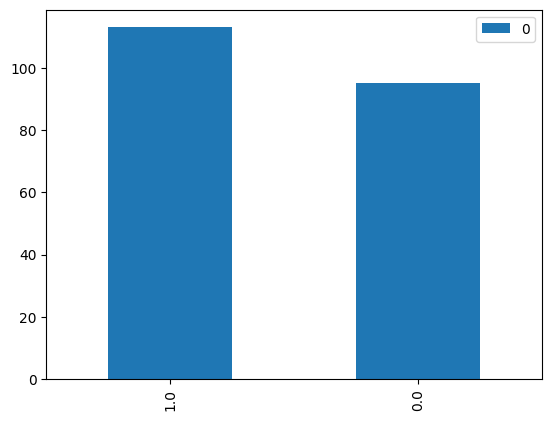

In [91]:
target = 'liquefied'

class_counts = Counter(df[target])
df_class = pd.DataFrame.from_dict(class_counts, orient="index")

# Plotting the class distribution
df_class.plot(kind="bar")

# Calculating the Proportion Chance Criterion (PCC)
proportions = df_class[0] / df_class[0].sum()
pcc = np.sum(proportions**2)

# Calculating 1.25 times PCC
augmented_pcc = 1.25 * pcc

print("Class distribution:\n", df_class)
print("Proportion Chance Criterion (PCC): {:.2f}%".format(100 * pcc))
print(
    "1.25 * Proportion Chance Criterion: {:.2f}%".format(100 * augmented_pcc))

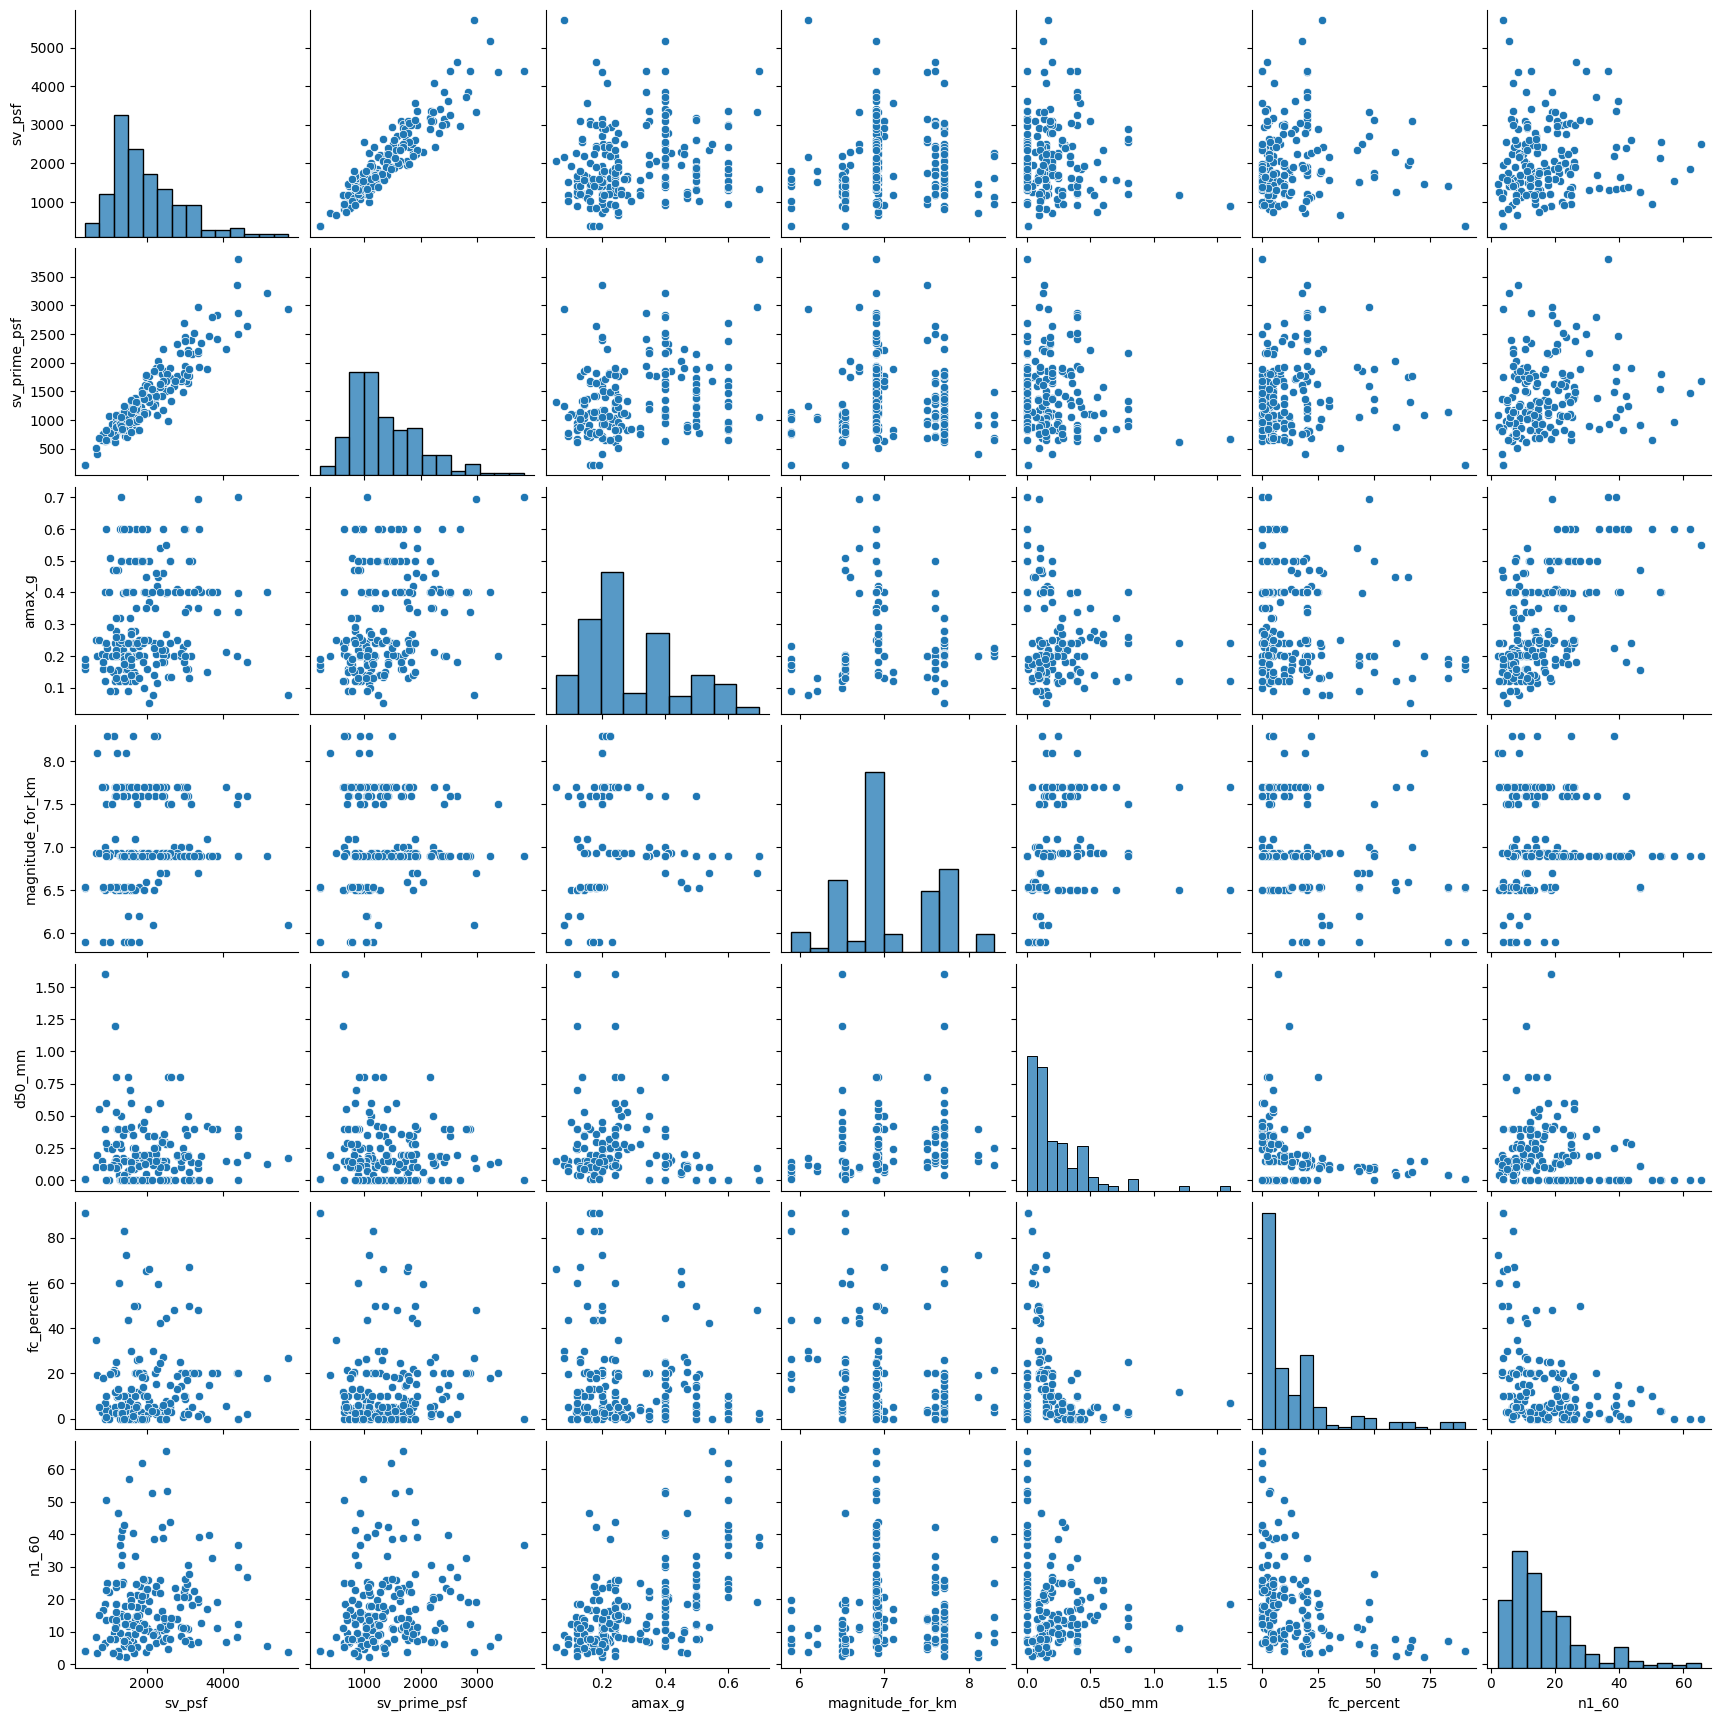

In [92]:
sns.pairplot(df.drop('liquefied', axis=1))

In [93]:
df.describe()

,liquefied,sv_psf,sv_prime_psf,amax_g,magnitude_for_km,d50_mm,fc_percent,n1_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.543269,1972.059165,1349.862063,0.294258,7.077212,0.216150,15.180607,16.763217
std,0.499326,916.785328,620.391589,0.151835,0.529199,0.249826,19.485853,11.950464
min,0.000000,369.803150,216.751181,0.051000,5.900000,0.000000,0.000000,2.190479
25%,0.000000,1319.020669,890.436352,0.180000,6.900000,0.046050,3.000000,7.948481
50%,1.000000,1737.782152,1161.356693,0.240000,6.915000,0.150000,8.000000,13.143110
75%,1.000000,2463.705709,1696.017060,0.400000,7.600000,0.292500,20.000000,21.576965
max,1.000000,5708.661417,3816.141732,0.700000,8.300000,1.600000,91.000000,65.468616


### **Preparing `X` and `y`**

In [94]:
X = df.drop(target, axis=1)
y = df[target]

In [95]:
# Data Preprocessing
# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1337)

# Check the shape of the resulting sets to confirm successful split and preprocessing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((135, 7), (73, 7), (135,), (73,))

### **All ML Models**

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

def calculate_pcc(y):
    if isinstance(y, pd.DataFrame):
        if y.shape[1] == 1:
            y = y.iloc[:, 0]
        else:
            raise ValueError("y DataFrame must have exactly one column")
    y = np.array(y, dtype=int)
    class_proportions = np.bincount(y) / len(y)
    return np.sum(class_proportions ** 2)

models = [
    ("KNN", KNeighborsClassifier()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("Logistic Regression L1", LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)),
    ("Logistic Regression L2", LogisticRegression(penalty='l2', max_iter=1000)),
    ("Naive-Bayes", GaussianNB()),
    ("Decision-Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGB", XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ("Support Vector Machine", SVC(probability=True)),
]
results = []
pcc = calculate_pcc(y_train)

for name, model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    results.append([name, train_accuracy, test_accuracy])

results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy'])
results_df.loc[9] = ["PCC * 1.25", pcc*1.25, pcc*1.25]
display(results_df)

,Model,Train Accuracy,Test Accuracy
0,KNN,0.703704,0.575342
1,Logistic Regression,0.762963,0.780822
2,Logistic Regression L1,0.777778,0.821918
3,Logistic Regression L2,0.762963,0.780822
4,Naive-Bayes,0.755556,0.684932
5,Decision-Tree,1.000000,0.753425
6,Random Forest,1.000000,0.794521
7,Gradient Boosting,1.000000,0.726027
8,XGB,1.000000,0.780822
9,PCC * 1.25,0.625857,0.625857


In [100]:
import time
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

def evaluate_classifiers(X_train, X_test, y_train, y_test):
    # Initialize models with the required configurations
    models = {
        'KNN': KNeighborsClassifier(),
        'Logistic Regression L1': LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000),
        'Logistic Regression L2': LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000),
        'SVC': SVC(probability=True),  # Ensure probability is True for AUC-PR calculation
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Naive Bayes': GaussianNB(),
        'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    }

    # DataFrame to store results
    cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'AUC_PR', 'Training Time', 'Testing Time']
    results_df = pd.DataFrame(columns=cols)

    for name, model in models.items():
        # Training
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time

        # Prediction
        start_time = time.time()
        y_pred = model.predict(X_test)
        testing_time = time.time() - start_time

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')

        # Calculate AUC-PR if model supports predict_proba
        if hasattr(model, "predict_proba"):
            precision_vals, recall_vals, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
            auc_pr = auc(recall_vals, precision_vals)
        else:
            auc_pr = 'N/A'  # Placeholder for models without predict_proba

        # Store in DataFrame
        results_df = results_df.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'AUC_PR': auc_pr,
            'Training Time': training_time,
            'Testing Time': testing_time
        }, ignore_index=True)

    return results_df

In [101]:
evaluate_classifiers(X_train, X_test, y_train, y_test)

,Model,Accuracy,Precision,Recall,AUC_PR,Training Time,Testing Time
0,KNN,0.575342,0.657895,0.581395,0.669174,0.008441,0.015846
1,Logistic Regression L1,0.821918,0.840909,0.860465,0.951168,0.006010,0.002023
2,Logistic Regression L2,0.780822,0.813953,0.813953,0.923003,0.003677,0.001709
3,SVC,0.589041,0.627451,0.744186,0.615071,0.010311,0.003178
4,Random Forest,0.780822,0.829268,0.790698,0.897036,0.569237,0.028204
5,Gradient Boosting,0.753425,0.820513,0.744186,0.906252,0.178121,0.002835
6,Decision Tree,0.753425,0.857143,0.697674,0.866450,0.003351,0.001865
7,Naive Bayes,0.684932,0.738095,0.720930,0.858967,0.003386,0.001969
8,XGBoost,0.780822,0.846154,0.767442,0.924686,1.728462,0.012462


## **Logistic Regression**

In [59]:
from sklearn.metrics import accuracy_score, classification_report

# Model Training
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy is: {accuracy}\n')
print(report)

Accuracy is: 0.821917808219178

              precision    recall  f1-score   support

         0.0       0.79      0.77      0.78        30
         1.0       0.84      0.86      0.85        43

    accuracy                           0.82        73
   macro avg       0.82      0.81      0.82        73
weighted avg       0.82      0.82      0.82        73



In [69]:
explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train, 268))

shap_values = explainer.shap_values(shap.sample(X_test, 268))

  0%|          | 0/73 [00:00<?, ?it/s]

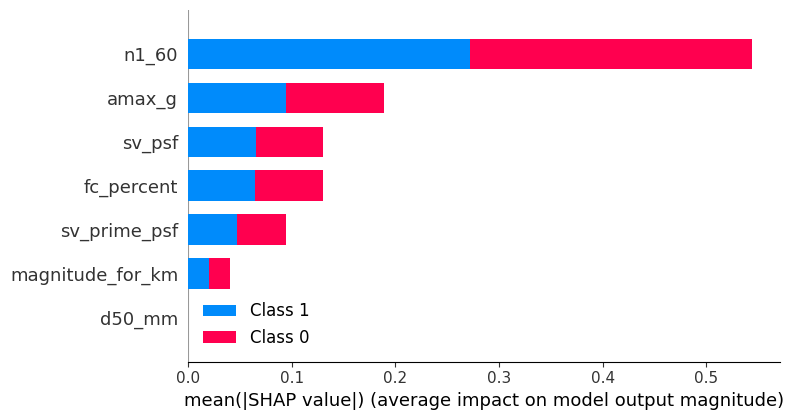

In [70]:
# Visualization
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

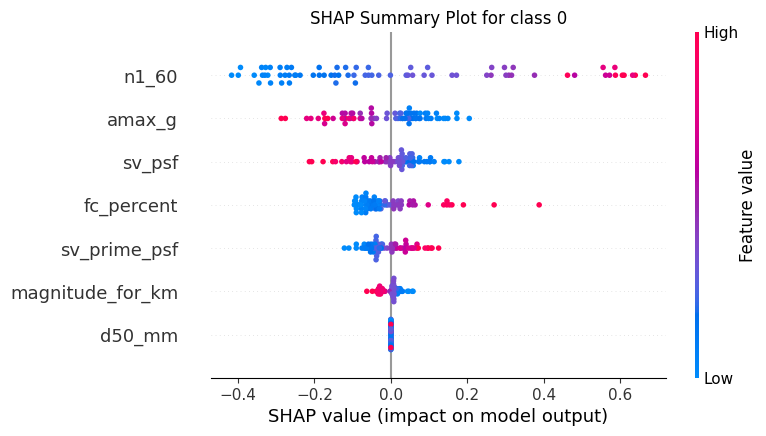

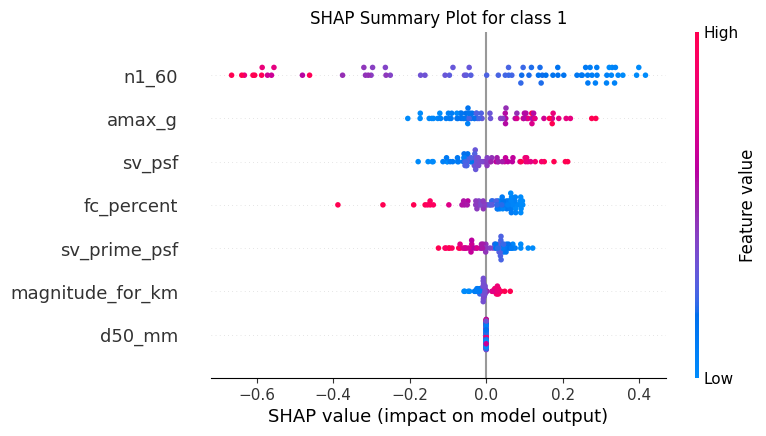

In [72]:
class_ordering = [0, 1]

for i, class_label in enumerate(class_ordering):
    # Ensure that the number of rows in shap_values[i] matches the number of instances in X_test
    assert shap_values[i].shape[0] == X_test.shape[0], f"Mismatch in rows for class {class_label}"

    # Plot the SHAP summary plot for the given class
    shap.summary_plot(shap_values[i], X_test, feature_names=X.columns, show=False)  # Remove 'show=False'

    # Title for the current class's plot
    plt.title(f"SHAP Summary Plot for class {class_label}")

    # Display the plot
    plt.show()

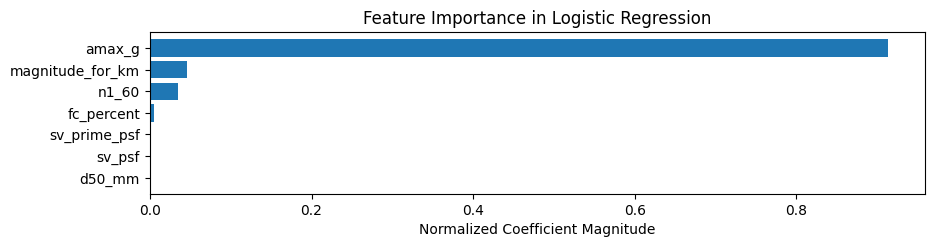

In [74]:
# Get the coefficients
coefficients = model.coef_[0]

# Note: Taking the absolute value to consider magnitude only
importance = np.abs(coefficients)

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(importance)[::-1]

# Normalize the importance values
normalized_importance = importance[sorted_indices] / np.sum(importance[sorted_indices])

plt.figure(figsize=(10, len(sorted_indices) * 0.3))
plt.barh(range(len(sorted_indices)), normalized_importance[::-1], align='center')
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices][::-1])
plt.xlabel("Normalized Coefficient Magnitude")
plt.title("Feature Importance in Logistic Regression")
plt.show()